# Problem Statement:  
To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.  
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) 
Also, if some data pre-processing is necessary do that as well. 

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data set
df= pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# checking the properties of data set

In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##### Data has 23 columns and 8124 records. All are object data types. Data set is about mushroom classification as edible or poisonous based on the features of mushroom

# Checking for null values

In [5]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

##### There are no null values in data

# Encoding the data to numerical values

In [6]:
#checking distinct values in each feature
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

##### As per above checking column veil-type is having only one value so this column will not contribute to the classification of mushroom as it always have same value 'p'. So we will drop the column veil-type

In [7]:
# dropping column veil-type
df.drop('veil-type',axis=1,inplace=True)

In [8]:
# we will split the data set to predictor and features
X=df.drop('class',axis=1)
y=df['class']

In [9]:
# Checking distinct values of features again encoding
X.nunique()

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [10]:
# label encoding the features
# importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
#creating an instance of encode
le=LabelEncoder()
cols=X.columns
for i in cols:
    X[i]=le.fit_transform(X[i])
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [11]:
#checking distinct count of X
X.nunique()

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

# Checking correlation of variables

<AxesSubplot:>

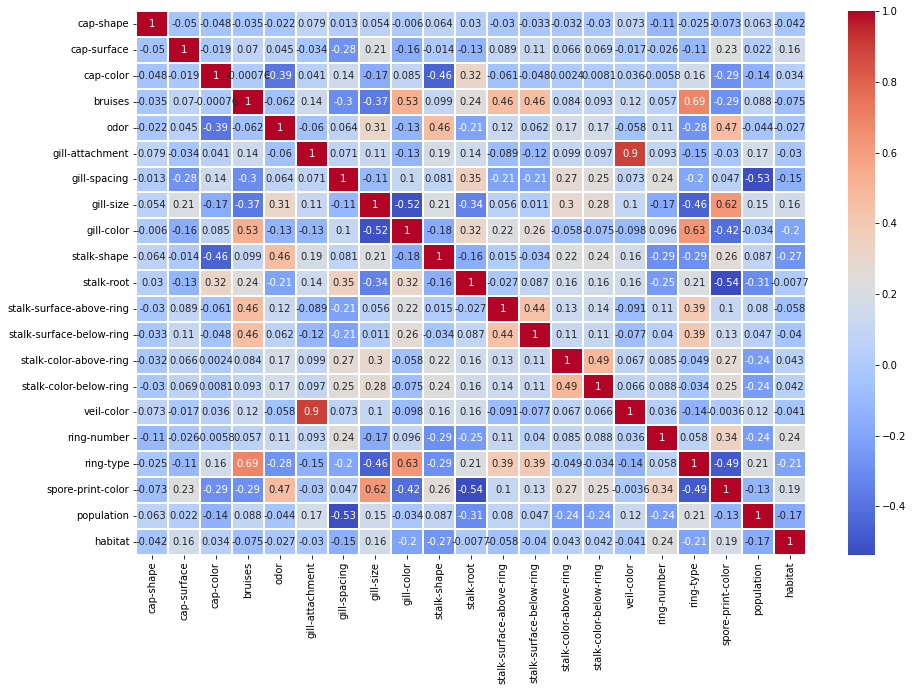

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True,linewidths=0.02,cmap='coolwarm')

##### As per correlation checking only gill-attachment and veil-color is having high correlation

# Checking distribution of Features

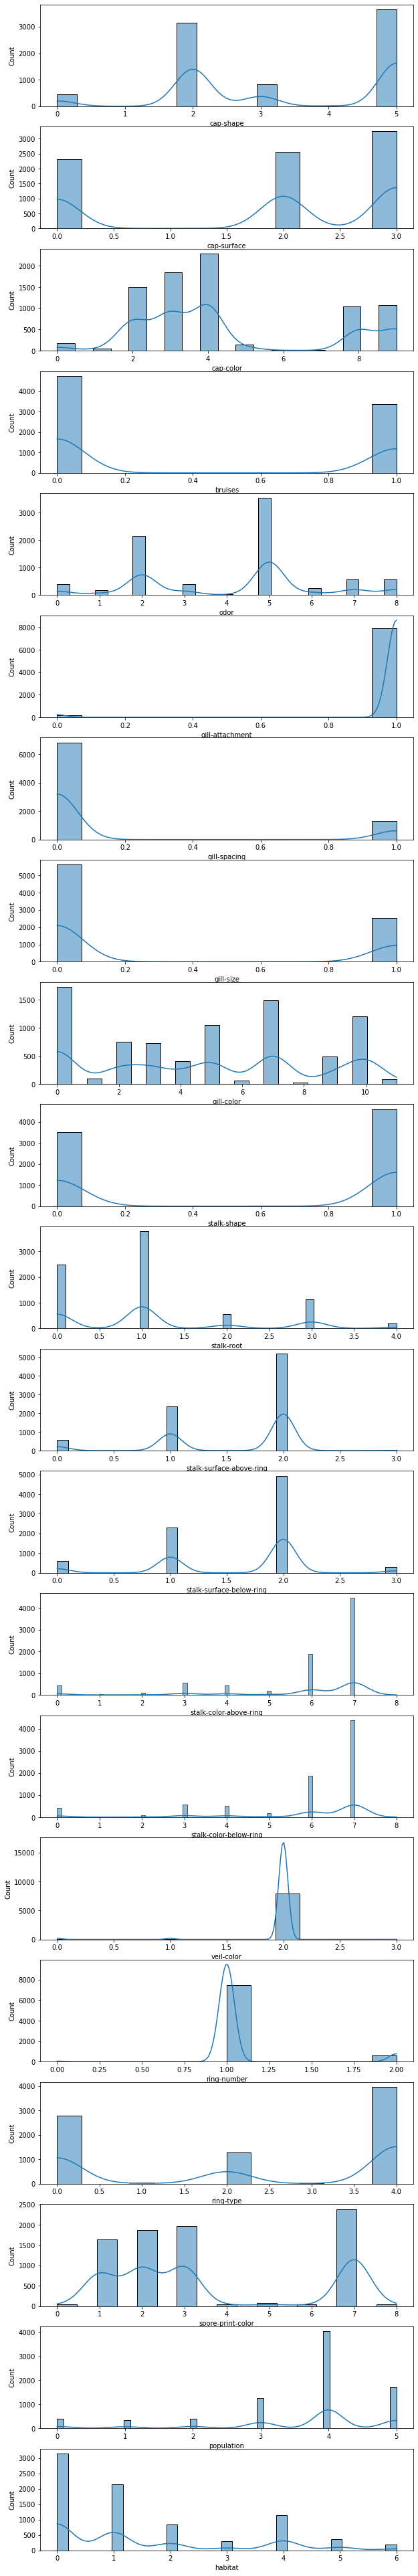

In [13]:
cols= X.columns
plt.figure(figsize=(10,70))
j=1
for i in cols:
    plt.subplot(21,1,j)
    sns.histplot(data=X[i],kde=True)
    j+=1

# Splitting to train test

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Fitting of Models

In [15]:
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

# Using KNN

In [16]:
acc_values=[]
neighbors=np.arange(3,20)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
print(acc_values) 

[0.9981538461538462, 0.9987692307692307, 0.9963076923076923, 0.9963076923076923, 0.9956923076923077, 0.9950769230769231, 0.9963076923076923, 0.9950769230769231, 0.9950769230769231, 0.9932307692307693, 0.9932307692307693, 0.9944615384615385, 0.9932307692307693, 0.9926153846153846, 0.9938461538461538, 0.9932307692307693, 0.9932307692307693]


### Plotting K value to obtain optimum neighbours

Text(0, 0.5, 'accuracy')

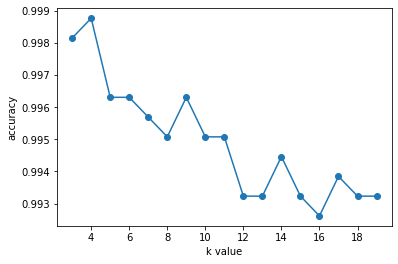

In [17]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

#### Accuracy is hghest for 3 so we will try with k=3

In [18]:
#K=3
classifier= KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(X_train,y_train) 
y_pred=classifier.predict(X_test)
print('F1 Score',f1_score(y_test,y_pred,pos_label='e'))
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

F1 Score 0.9982174688057042
Accuracy Score 0.9981538461538462
Confusion Matrix
 [[840   3]
 [  0 782]]
 Classification Report
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### KNN is giving very high accuracy score of 99.81%

# Using SVN model

In [19]:
# Linear Kernel
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)
print('F1 Score',f1_score(y_test,y_pred,pos_label='e'))
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

F1 Score 0.9741480611045829
Accuracy Score 0.9729230769230769
Confusion Matrix
 [[829  14]
 [ 30 752]]
 Classification Report
               precision    recall  f1-score   support

           e       0.97      0.98      0.97       843
           p       0.98      0.96      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



In [20]:
# Polynomial Kernel
svm_poly=SVC(kernel='poly')
svm_poly.fit(X_train,y_train)
y_pred=svm_poly.predict(X_test)
print('F1 Score',f1_score(y_test,y_pred,pos_label='e'))
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

F1 Score 1.0
Accuracy Score 1.0
Confusion Matrix
 [[843   0]
 [  0 782]]
 Classification Report
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [21]:
# RBF Kernel
svm_rbf=SVC(kernel='rbf',random_state=42)
svm_rbf.fit(X_train,y_train)
y_pred=svm_rbf.predict(X_test)
print('F1 Score',f1_score(y_test,y_pred,pos_label='e'))
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

F1 Score 0.9940968122786304
Accuracy Score 0.9938461538461538
Confusion Matrix
 [[842   1]
 [  9 773]]
 Classification Report
               precision    recall  f1-score   support

           e       0.99      1.00      0.99       843
           p       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



### SVM -linear is giving 97.29% accuracy, Polynomial is giving 100%, RBF is giving 99.38%

# Decision Tree

In [22]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print('F1 Score',f1_score(y_test,y_pred,pos_label='e'))
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

F1 Score 1.0
Accuracy Score 1.0
Confusion Matrix
 [[843   0]
 [  0 782]]
 Classification Report
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Decision Tree is giving 100% accuracy

# Random Forest

In [23]:
rf_mod = RandomForestClassifier(random_state=42)
rf_mod.fit(X_train,y_train)
y_pred=rf_mod.predict(X_test)
print('Accuracy Score',accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,pos_label='e'))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

Accuracy Score 1.0
1.0
Confusion Matrix
 [[843   0]
 [  0 782]]
 Classification Report
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Random Forest is giving 100% accuracy

# Logistic Regression

In [24]:
log_model=LogisticRegression(solver='liblinear')
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
print('F1 Score',f1_score(y_test,y_pred,pos_label='e'))
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

F1 Score 0.9483065953654187
Accuracy Score 0.9464615384615385
Confusion Matrix
 [[798  45]
 [ 42 740]]
 Classification Report
               precision    recall  f1-score   support

           e       0.95      0.95      0.95       843
           p       0.94      0.95      0.94       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



### Logistic regression is giving an accuracy score of 94.64%

# Using Naive Bayes Bernouli Classifier

In [25]:
#Naïve Bayes’ Classifier (Bernoulli)

from sklearn.naive_bayes import BernoulliNB
cla = BernoulliNB()
cla.fit(X_train,y_train)
y_pred = cla.predict(X_test)
print('F1 Score',f1_score(y_test,y_pred,pos_label='e'))
print('accuracy score',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))


F1 Score 0.8611561318206373
accuracy score 0.8418461538461538
Confusion Matrix
 [[797  46]
 [211 571]]
Classification Report
               precision    recall  f1-score   support

           e       0.79      0.95      0.86       843
           p       0.93      0.73      0.82       782

    accuracy                           0.84      1625
   macro avg       0.86      0.84      0.84      1625
weighted avg       0.86      0.84      0.84      1625



### <font color= red>Comparing to Other clustering models Naive Bayes is having a very low accuracy. it can be attributed to features being not independent